# Машинное обучение #

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Этап 0 - загрузка датасета ###

In [12]:
df = pd.read_csv('dataset_after_EDA.csv', engine='python')
df = df.dropna() # в процессе выгрузки датасета после проведения EDA появились пропуски, попробуем найти неисправность
df.head()

,title,publishedAt,channelTitle,category,trending_date,tags,view_count,likes,comment_count,comments_disabled,ratings_disabled,description,country,subscriber_count,daytime,times_appeared
0,How the Warriors were in the Locker Room after...,2023-05-13 12:48:44,RDCworld1,Sports,2023-05-14,[none],1733159.0,132947.0,5374.0,False,False,Another installment to the Warriors Locker Roo...,United States,6320000.0,1.0,3.0
1,FlightReacts To #6 WARRIORS at #7 LAKERS | FUL...,2023-05-13 06:20:56,FlightReacts,Entertainment,2023-05-14,Reactions|Family|vlog|life|NBA|sports|Friends|...,668981.0,37032.0,3496.0,False,False,Thanks for Tuning In!! Lets Get 5 Million Toge...,United States,4830000.0,1.0,3.0
2,GUESS THE MOM! *Emotional Mother's Day Reveal*,2023-05-13 14:00:07,Jordan Matter,Entertainment,2023-05-14,jordan matter|salish matter|say say matter|bre...,4225973.0,87240.0,11058.0,False,False,Today we reveal my wife for the first time EVE...,United States,15900000.0,1.0,4.0
3,Why Lightbulbs Might Be The Best Invention Ever,2023-05-13 14:06:52,Veritasium,Education,2023-05-14,veritasium|science|physics,1008255.0,65421.0,2934.0,False,False,Lightbulbs might be the best idea ever – just ...,United States,13600000.0,1.0,5.0
4,WATERTOK: The Strangest Community on TikTok,2023-05-12 19:00:20,Kurtis Conner,Comedy,2023-05-14,kurtis conner|kurtis connor|watertok|tiktok|co...,1393152.0,138921.0,9946.0,False,False,The Watertok community on TikTok is really str...,United States,4380000.0,0.0,8.0


Вспомним, какие столбцы содержит наш датасет после предобработки и создания новых признаков

*   `title` - название видео
*   `publishedAt` - время публикации видео, принцип кодирования: "DAY TIME"
    *   DAY - календарный день выпуска видео в формате YYYY-MM-DD
    *   TIME - время в формате HH:MM:SS


*   `channelTitle` - название канала, на котором видео было опубликовано
*   `category` - категория видео

*   `trending_date` - дата, в которую видео попало в список трендов

*   `tags` - теги, прикрепленные автором к видео

*   `view_count` - количество просмотров
*   `likes` - количество лайков
*   `comment_count` - количество комментариев под видео
*   `comments_disabled` - отключены ли под видео комментарии
*   `ratings_disabled` - отключена ли возможность просматривать количество лайков под видео
* `description` - описание видео
* `country` - страна, в чьи тренды попало видео
* `subscriber_count` - количество подписчиков канала
* `daytime` - время суток, в которое было опубликовано видео
    *   0 - видео опубликовано ночью (с 18:00 до 6:00)
    *   1 - видео опубликовано днем (с 6:00 до 18:00)
* `times_appeared` - количество стран, в которых видео попало в тренды

### Этап 1 - предсказывание количества лайков под видео ###

С помощью простой модели линейной регрессии попробуем предсказать количество лайков под видео. Соответственно, в качестве целевой переменной определяем столбец `likes`, в качестве вспомогательных признаков - `category`, `view_count`, `comment_count`, `country`, `subscriber_count`, `times_appeared`. Впоследствии мы планируем обучить ту же саму модель, но уже без использования признака `country`, так как есть вероятность отсутствия его влияния на обучаемую модель.

Поделим датасет на тренировочный и тестовый список в пропорции 80 на 20.

Также разумным будет убрать из рассмотрения повторяющиеся записи в таблице.

In [13]:
df = df.drop_duplicates(subset = 'title')
df_encoded = pd.get_dummies(df, columns=['category', 'country'])

df_train, df_test = train_test_split(df_encoded, test_size = 0.2, random_state = 42)

X_train = df_train.drop(['title', 'publishedAt', 'channelTitle', 'trending_date', 'tags', 'likes', 'comments_disabled', 'ratings_disabled', 'description', 'daytime'], axis = 1)
X_test = df_test.drop(['title', 'publishedAt', 'channelTitle', 'trending_date', 'tags', 'likes', 'comments_disabled', 'ratings_disabled', 'description', 'daytime'], axis = 1)


y_train = df_train['likes']
y_test = df_test['likes']

Замечаем, что среди наших вспомогательных переменных есть два категориальных признака - `category` и `country`. Мы применили метод One Hot Encoding из библиотеки pandas путем использования функции get_dummies

Итак, зададим и обучим нашу модель, получим предсказания первого класса

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

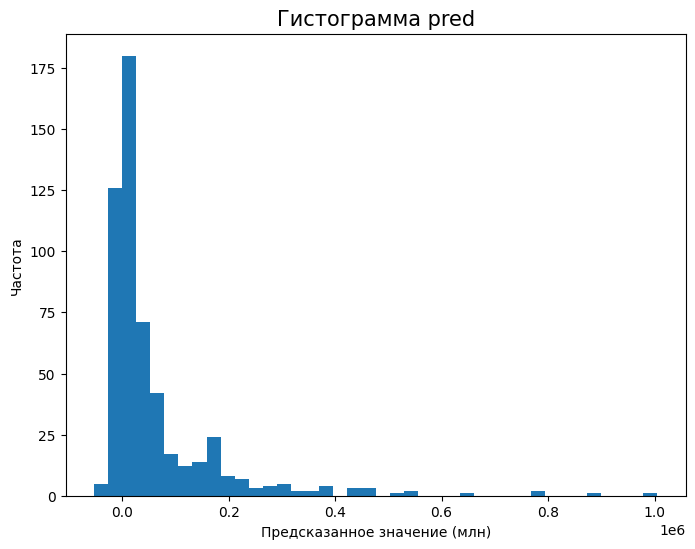

In [25]:
plt.figure(figsize = (8, 6))
plt.hist(pred, bins = 40)
plt.title('Гистограмма pred', fontsize = 15)
plt.xlabel('Предсказанное значение (млн)', fontsize = 10)
plt.ylabel("Частота", fontsize = 10);

КАКОЙ-НИБУДЬ ВЫВОД

Далее для оценки обученной модели посчитаем значения различных метрик

1. **Mean Squared Error** - среднеквадратичная

In [35]:
mean_squared_error(y_test, pred)

4380084637.382946

Получаем достаточно **большое значение** среднеквадратичной ошибки. Чем ниже значение MSE, тем лучше модель способна предсказывать целевую переменную. В дальнейшем попытаемся оптимизировать нашу модель, чтобы снизить значение метрики

2. **Mean Absolute Error** - средняя абсолютная ошибка

In [37]:
mean_absolute_error(y_test, pred)

32494.459016955774

Опять-таки получаем большое значение метрики. MAE измеряет среднюю абсолютную разницу между предсказанными значениями модели и фактическими значениями целевой переменной. В нашем случае, обученная **модель ошибается в среднем на 32494 лайка** при предсказывании. Полезным считаем сравнить отклонения нашей модели со стандартным отклонением показателя `likes`

In [42]:
mean_absolute_error(y_test, pred) / df['likes'].std()

0.25584331450589604

Отклонения предсказанных нашей моделью значений от истинных составляет около 25% от стандартного отклонения - приемлемый, но все еще высокий уровень ошибки

3. **R2** - коэффициент детерминации

In [48]:
r2_score(y_test, pred)

0.7408862753707615

Довольно **хороший показатель** метрики говорит о том, что модель объясняет около 74% изменчивости целевой переменной. В других словах, около 74% вариации в целевой переменной может быть объяснено или предсказано с использованием обученной нами модели. Оставшиеся 26% изменчивости могут быть связаны с другими факторами, которые модель не учитывает.

Итак, обучив базовую модель линейной регрессии, **получаем не самые хорошие значения метрик**, несмотря на относительно высокий показатель коэффициента детерминации. В следующем пункте обучим ту же модель, но уже без учета переменной `country`, как и планировали